# **DAMPED HARMONIC OSCILLATOR**

If we take a simple harmonic oscillator and add a damping term (i.e., a retarding force proportional to the velocity), we have the following 2nd order ODE.

#**NO DAMPING (Choosing zero damping for the system)**

# First I plot the Simple Harmonic Oscillation and then start plotting the Damped Oscillation Choosing Zero damping for the system.

# **Importing All Necessary libraries**

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import scipy

In [ ]:
from scipy.integrate import odeint

In [ ]:
from numpy import sqrt 

In [ ]:
from math import pi

In [ ]:
import math
math.cos

<function math.cos(x, /)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# The spring constant and mass.

k = 3.00 # N/m
m = 1.23 # kg

# Derived values.

w = (k/m)**0.5

# An array of times at which we want to evaluate the system.

t = np.array(np.arange(0, 60.0, 0.05))

# Incidentally, an alternative to using np.array(np.arange)
# is to use np.linspace as follows:
#
# t = np.linspace(0, 60.0, 60 * 20)

# Solve the ODE for the position of the mass.

x = 0.1 * np.cos(w*t)

# Plot the position as a function of time.

plt.plot(t, x)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

<IPython.core.display.Javascript object>

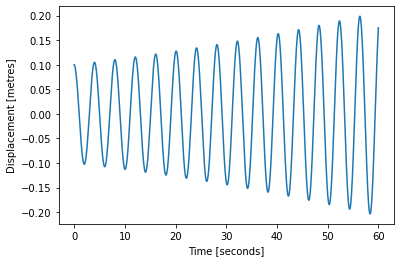

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.01
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity, and 
# initialise the array of positions.

x = 0.1
x_dot = 0.0
x_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)

     # Calculate the acceleration from the ODE.
    
    x_double_dot = -(k / m) * x
    
    # Update the position and velocity to the end of this time step.
    
    x += x_dot * dt
    x_dot += x_double_dot * dt

# Finally, plot the results.
    
plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

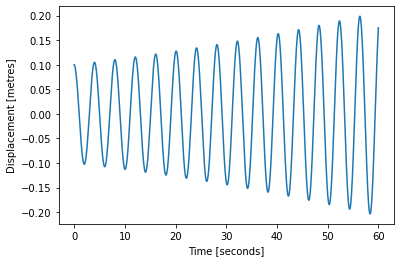

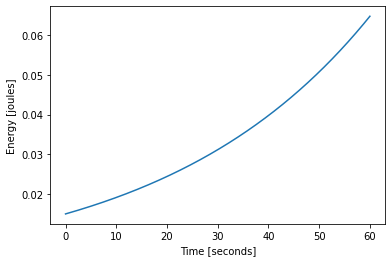

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.01
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity, and 
# initialise the array of positions.

x = 0.1
x_dot = 0.0
x_arr = []
e_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)
    
    # Calculate the total energy. This should remain constant.
    
    e_arr.append(0.5 * m * x_dot**2 + 0.5 * k * x**2)
        
    # Calculate the acceleration from the ODE.
    
    x_double_dot = -(k / m) * x
    
    # Update the position and velocity
    x += x_dot * dt
    x_dot += x_double_dot * dt

# Plot the results.

plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

plt.plot(t, e_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()

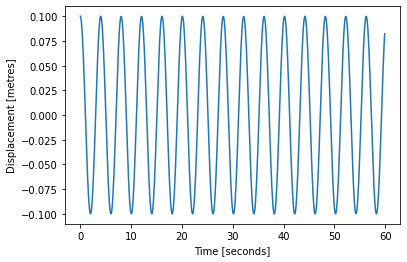

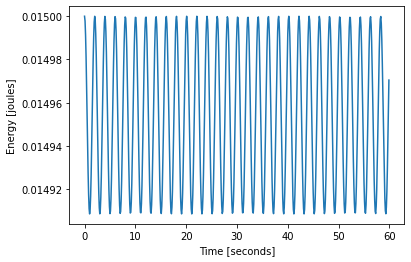

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the spring constant and mass.

k = 3.00
m = 1.23

# Choose the time step, and generate the array of time values.

dt = 0.1
t = np.array(np.arange(0, 60.0, dt))

# Set the initial position and velocity.

x = 0.1
x_dot = 0.0

# Update the velocity to the mid-point of the first time step.

x_double_dot = -(k / m) * x
x_dot += 0.5 * x_double_dot * dt

# Initialise our result arrays.

x_arr = []
e_arr = []

# Now step from one time to the next, updating the position, 
# velocity, and acceleration.

for time in t:

    # Add the current position to the array of positions.
    
    x_arr.append(x)
    
    # Calculate the total energy. This should remain constant.
    # Note that we backtrack the velocity to the beginning of the time step.
    
    e_arr.append(0.5 * m * (x_dot - 0.5 * x_double_dot * dt)**2 \
                 + 0.5 * k * x**2)
        
    # Update the position and velocity using the leapfrog algorithm.
    
    x += x_dot * dt
    x_double_dot = -(k / m) * x
    x_dot += x_double_dot * dt

# Plot the results.

plt.plot(t, x_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

plt.plot(t, e_arr)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()

In [ ]:
# Takes position and velocity stored in the list "y", and
# returns a list containing the time derivatives, i.e., 
# velocity and acceleration.
#
# "t" (the time) is not used in this function (it could be used
# to include a forcing function).
# "w" contains the angular frequency, which is a constant supplied
# by the user.

def f(y, t, w):
    x, v = y
    return [v, -(w**2) * x]

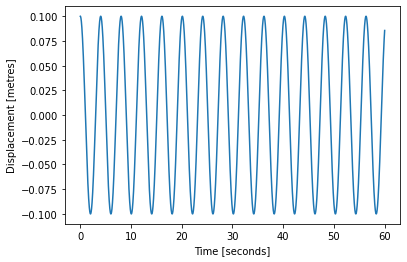

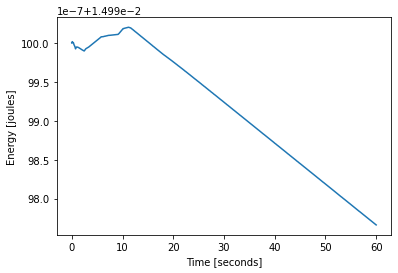

In [ ]:
def f(y, t, w):
    x, v = y
    return [v, -(w**2) * x]
import numpy as np
from scipy.integrate import odeint

# Create an array of time values.

t = np.linspace(0, 60.0, int(60 / 0.01))

# The parameters of the spring system.

k = 3.00
m = 1.23
w = (k / m)**0.5

# Solve it! Note that the additional "args" supplied to "odeint"
# must be in a tuple; "(w,)" creates a single-element tuple.

solution = odeint(f, [0.1, 0.0], t, args=(w,))

# "solution" is a 2D array, the first column contains the positions
# and the second column the velocities.

plt.plot(t, solution[:,0])
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
plt.show()

# Calculate the energy and plot it.

e = 0.5 * m * solution[:,1]**2 + 0.5 * k * solution[:,0]**2 
plt.plot(t, e)
plt.xlabel("Time [seconds]")
plt.ylabel("Energy [joules]")
plt.show()

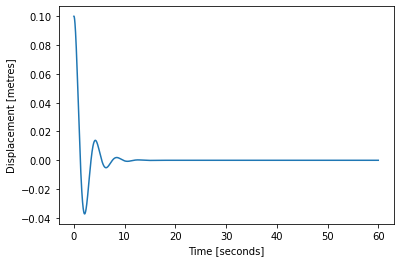

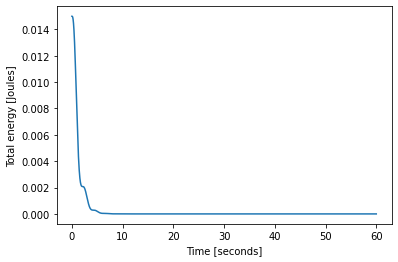

In [ ]:
def f(y, t, zeta, w0):
    x, v = y
    return [v, -2.0 * zeta * w0 * v - (w0**2) * x]

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Create an array of time values.

t = np.linspace(0, 60.0, int(60.0 / 0.01))

# The parameters.

zeta = 0.3

# We are using the same angular frequency as for the 
# previous simple harmonic case.

k = 3.00
m = 1.23
w0 = (k / m)**0.5

# Solve it! Note that the initial conditions are x = 0.1, v = 0.0.
solution = odeint(f, [0.1, 0.0], t, args=(zeta, w0))

# "solution" is a 2D array, the first column contains the positions
# and the second column the velocities.

plt.plot(t, solution[:,0])
plt.xlabel("Time [seconds]")
plt.ylabel("Displacement [metres]")
# Uncomment this line to zoom in on the zero crossing.
# plt.ylim(-0.0001,0.0001) 
plt.show()

# Uncomment these lines to plot energy.

plt.plot(t, 0.5 * m * solution[:,1] ** 2 + 0.5 * k * solution[:,0]**2)
plt.ylabel("Total energy [Joules]")

plt.xlabel("Time [seconds]")
plt.show()

In [ ]:
import math
def f(y, t, zeta, w0):
    x, v = y
    return [v, -2.0 * zeta * w0 * v - (w0**2) * x + 0.1 * math.cos(3 * w0 * t)]

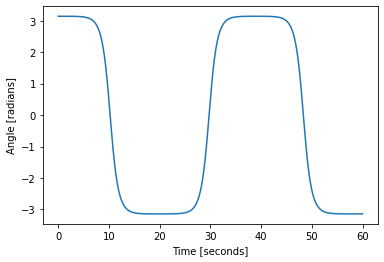

period from zero-crossing times:  38.09137134840271
period using the small angle approximation:  6.344823283108564


In [ ]:
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Here is the function that defines our set of coupled ODEs.
# "y" is a numpy array containing theta and theta_dot.
# The function returns a numpy array containing
# theta_dot and theta_double_dot. "t" is the list of times,
# which we don't use in this case. "gravity" and "l" are constants.

def f(y, t, gravity, l):
    theta, theta_dot = y
    return [theta_dot, - (gravity / l) * math.sin(theta)]

# Create an array of time values.

t = np.linspace(0, 60.0, int(60.0 / 0.001))

# The parameters.

gravity = 9.80665
l = 10.0

# Solve it! The 2nd argument to "odeint" gives the initial conditions.

solution = odeint(f, [math.pi * 0.9999, 0.0], t, args=(gravity, l))

plt.plot(t, solution[:,0])
plt.xlabel("Time [seconds]")
plt.ylabel("Angle [radians]")
plt.show()

# Now we are going to calculate the period of oscillation.
# We do that by looking through the array of angular positions 
# (i.e., solution[:,0]), and finding the zero-crossing times.

# Begin by initializing a list where we will store the zero-crossing
# times as we find them.

zero_crossing_times = []

# Now we examine the angles in time order, looking for a change in
# sign from one to the next. "i" is used to keep track of the
# element number we are up to in the array of angles

i = 0;
for x in solution[:,0]:
    
    # The first time around the loop, we don't have a value for
    # "prev_x", which is the previous value of the angle, so we
    # make a special case.
    
    if i != 0:
        
        # Test for zero-crossing.
        
        if x * prev_x < 0:
            
            # Use linear interpolation to refine the time of
            # zero-crossing.
            
            z = t[i-1] + (t[i] - t[i-1]) * prev_x / (prev_x - x)
            
            # And store it in our list.
            
            zero_crossing_times.append(z)
    prev_x = x
    i += 1

# We have now examined all the data, so use the longest time separation
# between zero-crossings, and divide by the number of periods.

if len(zero_crossing_times) > 1:
    print("period from zero-crossing times: ", (zero_crossing_times[-1] - zero_crossing_times[0]) / 
          (0.5 * (len(zero_crossing_times) - 1)))

# Compare with the small-angle approximation.

print("period using the small angle approximation: ", 2*math.pi*(l / gravity)**0.5)

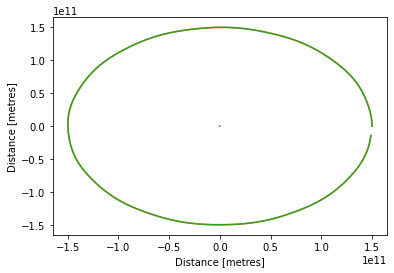

In [ ]:
import math
import numpy as np
import scipy.constants
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

G  = scipy.constants.G # big G, the gravitational constant

solar_system = True

if solar_system:

    m1 = 1.989E30 # mass of the sun
    m2 = 5.976E24 # mass of the earth
    m3 = 7.342E22 # mass of the moon

else:
    
    m1 = 4.0E30
    m2 = 5.0E30
    m3 = 3.0E30

# The numpy 1D array "y" contains the 3D positions of the 
# sun, earth, and moon, followed by their 3D velocities.
# That is 18 numbers in all. The "t" array of times is not used.
#
# "f" returns the time derivatives of these quantities.

def f(y, t):
    
    # Extract the positions from "y".
    
    x1, y1, z1, x2, y2, z2, x3, y3, z3 = y[:9]
    
    # We calculate the cube of the distances between the objects,
    # since we need to divide by distance squared, and then an
    # additional factor of the distance to allow for the unit
    # vector calculation of the force direction. Think about it!
    
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**1.5
    r13 = ((x1-x3)**2 + (y1-y3)**2 + (z1-z3)**2)**1.5
    r23 = ((x3-x2)**2 + (y3-y2)**2 + (z3-z2)**2)**1.5
    
    # Calculate the 3D components of the accelerations.
    
    ax1 = - G * (m2*(x1-x2)/r12 + m3*(x1-x3)/r13)
    ay1 = - G * (m2*(y1-y2)/r12 + m3*(y1-y3)/r13)
    az1 = - G * (m2*(z1-z2)/r12 + m3*(z1-z3)/r13)

    ax2 = - G * (m1*(x2-x1)/r12 + m3*(x2-x3)/r23)
    ay2 = - G * (m1*(y2-y1)/r12 + m3*(y2-y3)/r23)
    az2 = - G * (m1*(z2-z1)/r12 + m3*(z2-z3)/r23)

    ax3 = - G * (m2*(x3-x2)/r23 + m1*(x3-x1)/r13)
    ay3 = - G * (m2*(y3-y2)/r23 + m1*(y3-y1)/r13)
    az3 = - G * (m2*(z3-z2)/r23 + m1*(z3-z1)/r13)
    v = y[9:]
    return v.tolist() + [ax1, ay1, az1, ax2, ay2, az2, ax3, ay3, az3]

# Create an array of time values. The order of the arguments to np.linspace is
#  - initial time
#  - final time
#  - number of steps

if solar_system:
    t = np.linspace(0, 3600*24*360, 3000)
else:
    t = np.linspace(0, 3600*40, 600000)

# Solve it! The 2nd argument to "odeint" gives the initial conditions,
# which have been carefully chosen to make the sun/earth/moon system
# agree fairly closely with our solar system. It would have been better
# to have placed the barycentre of the solar system at (0,0,0) rather
# than the sun. We start with the sun, earth, and moon on the x-axis.

if solar_system:
    solution = odeint(f, 
                          [0,0,0,                  # position of the sun
                          149.6e9,0,0,             # position of the earth
                          149.6e9 + 3.84399e8,0,0, # position of the moon
                          0,0,0,                   # velocity of the sun
                          0,29.786e3,0,            # velocity of the earth
                          0,29.786e3 + 1022,0      # velocity of the moon
                          ], t)
else:
    solution = odeint(f, 
                          [0,0,0,                  # position of the 1st star
                          30.0e8,0,0,              # position of the 2nd star
                          30.0e8, 40.0e8,0,        # position of the 3rd star
                          0,0,0,                   # velocity of the 1st star
                          0,0,0,                   # velocity of the 2nd star
                          0,0,0                    # velocity of the 3rd star
                          ], t)

# And plot the solution.

plt.plot(solution[:,0], solution[:,1]) # plot the (x,y) position of the sun or 1st star
plt.plot(solution[:,3], solution[:,4]) # plot the (x,y) position of the earth or 2nd star
plt.plot(solution[:,6], solution[:,7]) # plot the (x,y) position of the moon or 3rd star
#plt.plot(solution[:,6]-solution[:,3], solution[:,7]-solution[:,4]) # plot moon relative to earth
plt.xlabel("Distance [metres]")
plt.ylabel("Distance [metres]")
plt.show()

In [ ]:
from array import array

In [ ]:
import math
math.cos

<function math.cos(x, /)>

In [ ]:
from math import cos

In [ ]:
from math import sin

#**NO DAMPING (Choosing zero damping for the system)**

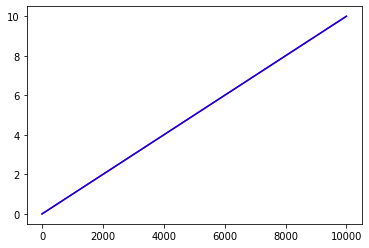

In [ ]:

from scipy.integrate import odeint  #the differential equation integrator
# To reduce demand on memory, we import only a subset of the scipy package
k = 8.0
m = 2.0 
w= sqrt(k/m)
#optional damping parameter, such that the damping force is -(gamma_damp)*v
gamma_damp = 0.00


#Create the time array for the solution.  Just 10 seconds will be enough to illustrate the technique for now
delta_t = 0.001   #time step of integration
tend = 10
t = np.arange(0.0,tend,delta_t)

# Set the initial conditions
x_0 = 3.0
v_0 = 1.0

#x_analytical = (x_0)*cos(w*t) + (1/w)*sin(w*t)      
#dxdt = -(x_0*w)*sin(w*t) + cos(w*t)


plt.figure(1)
plt.plot(t, color='red') #x_analytical,
plt.plot(t, color='blue') #dxdt,
#title("Spring position and velocity vs. time")

# **Show that setting beta=0  is identical to the undamped case**

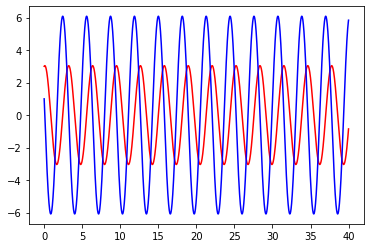

In [ ]:

def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)

      beta = param[0]
    #unpack the variables
      x = r[0]
      v = r[1]
    #perform the derivatives
      dxdt = v  #fix
      dvdt = -x*(omega0)**2 - 2*beta*v  #fixed?
    
      return np.array([dxdt, dvdt],float)

t = np.arange(0.0,40.0, 0.004)
beta = 0.0 # The damping parameter.
param = np.array([beta]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
plt.figure()
plt.plot(t, r[:,0],color='red')
plt.plot(t, r[:,1],color='blue')

undamped_xsolution = r[:,0]

# **MEDIUM DAMPING FOR THE SYSTEM**

Text(0.5, 1.0, 'Position (Red) and Velocity (Blue) vs. Time')

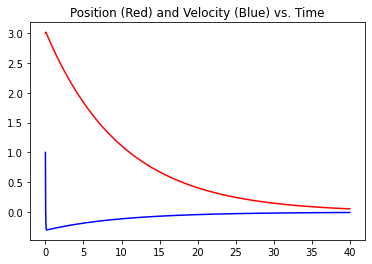

In [ ]:
t = np.arange(0.0,40.0,0.004)
beta = 10*omega0 # The damping parameter. 
param = np.array([beta]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r = odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args =(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
plt.figure()
plt.plot(t, r[:,0],color='red')
plt.plot(t, r[:,1],color='blue')
plt.title("Position (Red) and Velocity (Blue) vs. Time")

# **HIGH DAMPING FOR THE SYSTEM**

Text(0.5, 1.0, 'Position (Red) and Velocity (Blue) vs. Time')

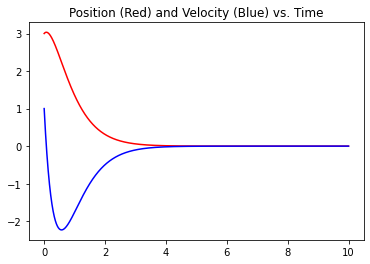

In [ ]:
t = np.arange(0.0,10.0,0.001)
beta = omega0 # The damping parameter. 
param = np.array([beta]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r = odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args =(param,)) # Including the param array in the arguments we pass
                                                                # to odeint

#### CODE TO PLOT x(t) AND v(t) HERE
plt.figure()
plt.plot(t, r[:,0],color='red')
plt.plot(t, r[:,1],color='blue')
plt.title("Position (Red) and Velocity (Blue) vs. Time")


# **UNDER-DAMPING (LOW DAMPING FOR THE SYSTEM)**

The oscillating frequency for this system is  1.98997487421324


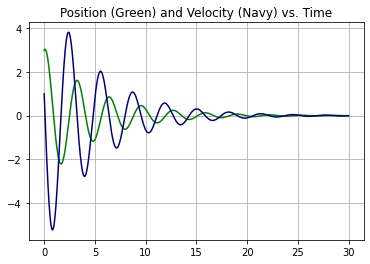

In [ ]:
t = np.arange(0.0,30.0,0.001)
omega0 = 2.0
beta = omega0/10.0
param = np.array([beta])
x0 = 3.0
v0 = 1.0
freq = sqrt((omega0**2)-(beta**2))
            
rinit = np.array([x0,v0])      
r = odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args =(param,))

print("The oscillating frequency for this system is ",freq)
plt.figure(1)
plt.plot(t,r[:,0],color='green')
plt.plot(t,r[:,1],color='navy')
plt.title("Position (Green) and Velocity (Navy) vs. Time")
plt.grid()

# **THE END** ...
# **THANK-YOU!** 